<a href="https://colab.research.google.com/github/Abhimanyu100/ML-Project-/blob/master/ML1(Breast_Cancer_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Detection using Machine Learning
Used SVM and KNN algorithm to predict  whether the cell are Cancer, Benign,  Malignant or healthy
**

In [0]:
#Import all libraries
import numpy as np
import sys
import sklearn #ML library
import matplotlib #python visualization library

In [0]:
!pip install --upgrade pandas

In [0]:
!pip install --upgrade pip
!pip install jupyter


In [0]:
#preprocess the data
from sklearn import preprocessing
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
#Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
        'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
        'bland_chromatin', 'norma_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [6]:
df.replace('?', -99999, inplace=True)
print(df.axes)
df.drop(['id'], 1, inplace=True)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'norma_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [7]:
#Dataset visualization
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
signle_epithelial_size     2
bare_nuclei               10
bland_chromatin            3
norma_nucleoli             1
mitoses                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size  bland_chromatin  \
count         699.000000        

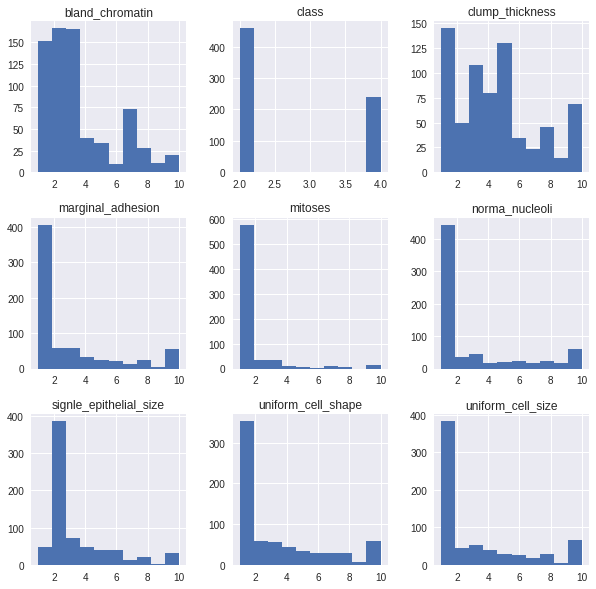

In [8]:
#plot histogram
df.hist(figsize = (10, 10))
plt.show()

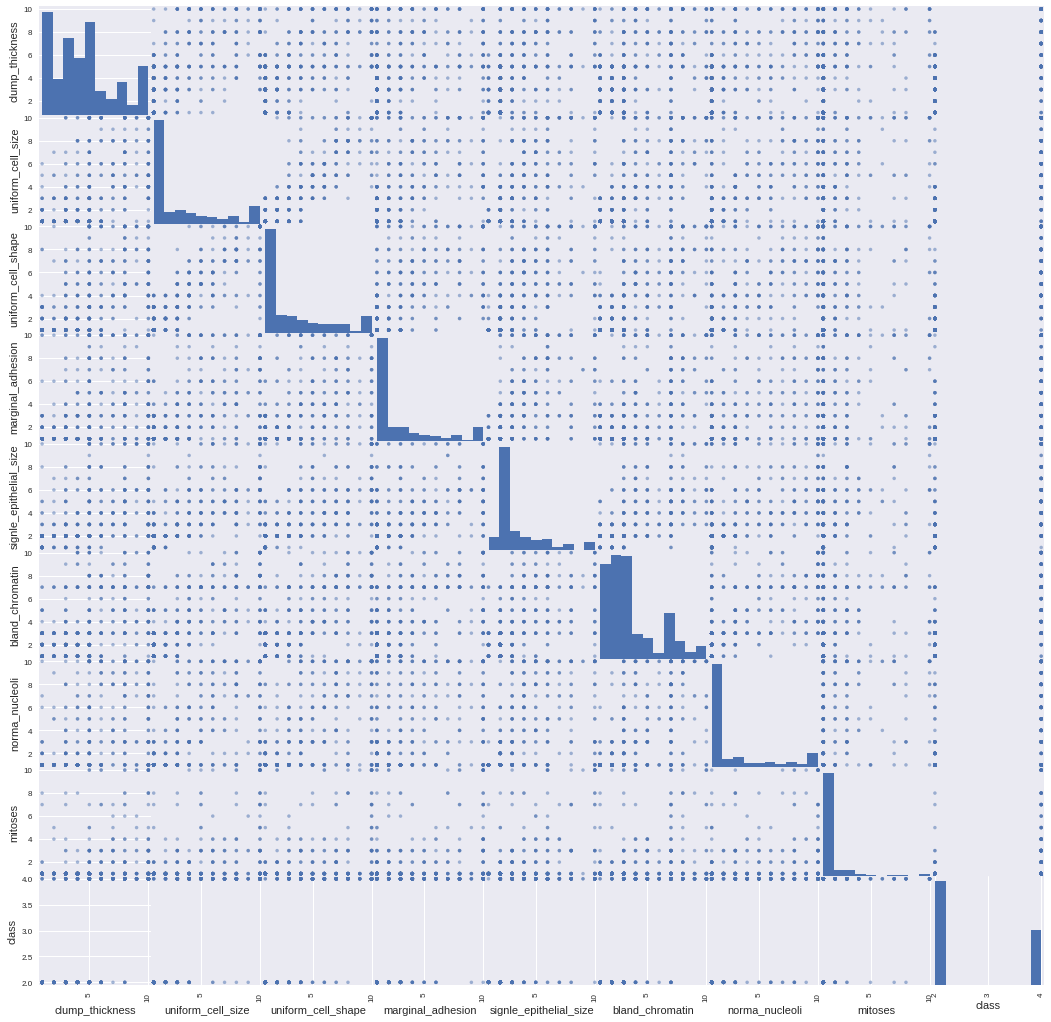

In [9]:
scatter_matrix(df, figsize= (18, 18))
plt.show()

In [0]:
#split the data in two part i.e, training and test dataset
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

#divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
#specify testing options
seed = 8
scoring = 'accuracy'

In [12]:

###new##
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.973182 (0.016446)
SVM: 0.953474 (0.030118)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [13]:
#MAKE prediction on the unseen data (validation/test data)
for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test, predictions))
  print(classification_report(y_test, predictions))

KNN
0.9571428571428572
              precision    recall  f1-score   support

           2       0.96      0.98      0.97        88
           4       0.96      0.92      0.94        52

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        88
           4       0.91      1.00      0.95        52

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4, 2, 1, 1, 1, 2, 3, 2, 10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

#####Class 4:  Malignant####
####Class 2:  Benign####

0.9642857142857143
[4]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
